In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
X = np.eye(8)
#Each row is a learning example

Y = X
print(Y)

# We need to have 8 inputs (each number in a row of the matrix), a hidden layer with 3 nodes + bias and an output layer with 8 nodes

n_input = 8 # We need to have 8 inputs (each number in a row of the matrix)
n_hidden = 3
n_output = 8

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [18]:
epsilon = 0.1

#Weights
# np.random.seed(42)

w1 = np.random.normal(0, epsilon, (n_input, n_hidden)) # 8 x 3 Weights for input to hidden
print(w1)
w2 = np.random.normal(0, epsilon, (n_hidden, n_output)) # 3 x 8 Weights for hidden to output
print(w2)

# w1 = np.zeros((n_input, n_hidden))
# print(w1)
# w2 = np.zeros((n_hidden, n_output))

#Biases
b1 = np.random.normal(0, epsilon, n_hidden) # Bias for hidden layer (3)
b2 = np.random.normal(0, epsilon, n_output) # Bias for output layer (8)

# b1 = np.zeros(n_hidden)
# b2 = np.zeros(n_output)





[[-0.11400896 -0.05778607 -0.02050321]
 [-0.0659918  -0.04125907 -0.09957691]
 [-0.19894124 -0.21462709  0.03154584]
 [-0.04783116 -0.19418425  0.05448566]
 [-0.09843707 -0.14401683  0.1033764 ]
 [-0.09539875 -0.05916305 -0.1986598 ]
 [ 0.07786692  0.04929646  0.0150071 ]
 [-0.03991485  0.06170411 -0.06208268]]
[[ 0.04403852 -0.06624588 -0.16758741  0.02864277 -0.15155292 -0.06333865
   0.01756982  0.22814105]
 [-0.08877871  0.01162993  0.06489709 -0.01075022 -0.0740662   0.02279554
  -0.08458371  0.03742533]
 [ 0.01970089  0.01444928 -0.08863387  0.10946215 -0.03216451 -0.14592986
   0.06258368  0.0536629 ]]


In [19]:
#Activation function, our single neuron corresponds exactly to the input-output mapping defined by logistic regression.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Used to compute the weighted input for a layer, which then is put into the activation function
def weighted_input(X, W, b):
    return np.dot(X, W) + b

#One-half squared-error cost function
def halfmse(Y, second_layer_output):
    return np.mean(0.5 * (Y - second_layer_output) ** 2)

In [20]:

#Could also have used a*(1-a) if we don't want to calculate z serperatly
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

#Element-wise multiplication
def delta_output(Y, a, z):
    return (a-Y)*sigmoid_derivative(z)

#In order to do the matrix multiplication, we use this order because each row is a learning example
def delta_hidden(W, next_delta, z):
    return np.dot(next_delta, np.transpose(W))*sigmoid_derivative(z)

#In order to do the matrix multiplication, again we use this order because each row is a learning example
def gradient_weight(next_delta, a):
    return np.dot(np.transpose(a), next_delta)
    
#Sum over rows (axis=0), as again each row is a learning example
def gradient_bias(next_delta):
    return np.sum(next_delta, axis=0)


In [21]:

alpha = 0.9

converged = False
i = 0

#For plotting
it_plot = []
loss_plot = []

while(converged is False):
    
    #Input layer
    a1 = X

    #Hidden layer
    z2 = weighted_input(X, w1, b1)
    a2 = sigmoid(z2)
    
    #Output layer
    z3 = weighted_input(a2, w2, b2)
    a3 = sigmoid(z3)

    #Output layer
    delta3 = delta_output(Y, a3, z3)

    #Hidden layer
    delta2 = delta_hidden(w2, delta3, z2)
    
    #Gradient for weight is same shape as W1/W2 (8x3/3x8)
    #Gradient for bias is same shape as b1/b2 (1x3/1x8)
    Delta_w2 = gradient_weight(delta3, a2)
    Delta_b2 = gradient_bias(delta3)

    Delta_w1 = gradient_weight(delta2, X)
    Delta_b1 = gradient_bias(delta2)

    #Update weights, devide by amount of learning examples
    w1 += -alpha*(Delta_w1/8)
    w2 += -alpha*(Delta_w2/8)

    #Update bias
    b1 += -alpha*(Delta_b1/8)
    b2 += -alpha*(Delta_b2/8)
    
    #Keep track for plot
    loss_plot.append(halfmse(Y,a3))
    it_plot.append(i)
    i+=1
    
    if i % 1000 == 0:
            print("MSE after iteration", i, ":", halfmse(Y, a3))
             
            # print(w1)
            # print(w2)
            
            print(a3)
            
    if halfmse(Y,a3) < 0.01:
        converged = True
        print("MSE after iteration", i, ":", halfmse(Y, a3))
             
        print(w1)
        print(w2)
            
        print(a2)
        print(a3)


        break
            
          
           

MSE after iteration 1000 : 0.04282025634254585
[[0.14547645 0.11652934 0.13076919 0.21683885 0.15990072 0.10189821
  0.1472676  0.15315228]
 [0.11807487 0.13059911 0.17939068 0.12670155 0.13388449 0.17061311
  0.12372188 0.14899419]
 [0.11728516 0.15090705 0.44880453 0.11524809 0.23865026 0.11130574
  0.09942846 0.08245118]
 [0.16520309 0.09574019 0.09744376 0.34318016 0.19263458 0.04449177
  0.1644352  0.14000401]
 [0.15357891 0.12696746 0.27657405 0.23398486 0.26085529 0.06112026
  0.13099463 0.09747546]
 [0.11509981 0.17368115 0.13403104 0.0667577  0.07290604 0.5685413
  0.13349765 0.26254732]
 [0.12632462 0.10482068 0.09667877 0.19026236 0.12249495 0.10692633
  0.14208119 0.16618677]
 [0.11810893 0.11679582 0.07407261 0.13460624 0.08196288 0.23352602
  0.14520107 0.22616413]]
MSE after iteration 2000 : 0.020050130908701235
[[4.12407089e-01 1.42095592e-01 2.41256611e-02 1.10930082e-01
  1.47509972e-01 1.20533378e-01 9.28485770e-02 1.33341400e-01]
 [1.08568082e-01 1.52285714e-01 1.18

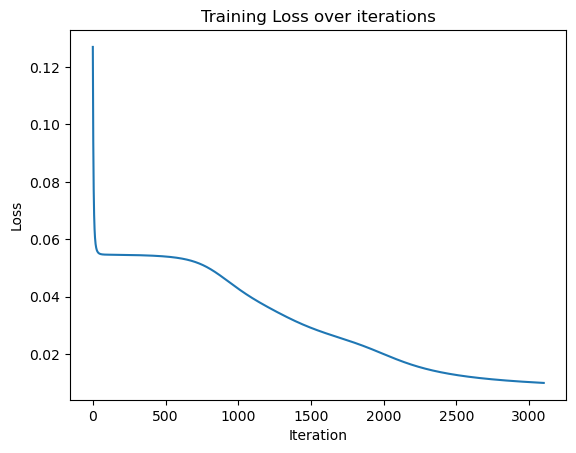

In [22]:
plt.plot(it_plot, loss_plot)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss over iterations")
plt.show()

In [23]:

alpha_list = [0.01, 0.05, 0.25, 1.25, 5, 25, 50]



#For plotting
it_needed_plot = []
alpha_plot = []

for alpha in alpha_list:
    converged = False
    i = 0
    
    #Again initialization, as w1, w2, b1, and b2 are already updated for convergence before.
    w1 = np.random.normal(0, epsilon, (n_input, n_hidden)) # 8 x 3 Weights for input to hidden
    print(w1)
    w2 = np.random.normal(0, epsilon, (n_hidden, n_output)) # 3 x 8 Weights for hidden to output
    print(w2)

    #Biases
    b1 = np.random.normal(0, epsilon, n_hidden) # Bias for hidden layer (3)
    b2 = np.random.normal(0, epsilon, n_output) # Bias for output layer (8)
    
    while(converged is False):
        
        #Input layer
        a1 = X

        #Hidden layer
        z2 = weighted_input(X, w1, b1)
        a2 = sigmoid(z2)
        
        #Output layer
        z3 = weighted_input(a2, w2, b2)
        a3 = sigmoid(z3)

        #Output layer
        delta3 = delta_output(Y, a3, z3)

        #Hidden layer
        delta2 = delta_hidden(w2, delta3, z2)
        
        #Gradient for weight is same shape as W1/W2 (8x3/3x8)
        #Gradient for bias is same shape as b1/b2 (1x3/1x8)
        Delta_w2 = gradient_weight(delta3, a2)
        Delta_b2 = gradient_bias(delta3)

        Delta_w1 = gradient_weight(delta2, X)
        Delta_b1 = gradient_bias(delta2)

        #Update weights, devide by amount of learning examples
        w1 += -alpha*(Delta_w1/8)
        w2 += -alpha*(Delta_w2/8)

        #Update bias
        b1 += -alpha*(Delta_b1/8)
        b2 += -alpha*(Delta_b2/8)
        
        i += 1
        
        if i % 1000 == 0:
                print("MSE after iteration", i, ":", halfmse(Y, a3))
                
                # print(w1)
                # print(w2)
                
                print(a3)
                
        #Converged if loss is below 0.01
        if halfmse(Y,a3) < 0.01:
            converged = True
            print("MSE after iteration", i, ":", halfmse(Y, a3))
                
            print(w1)
            print(w2)
                
            print(a3)
            
            it_needed_plot.append(i)
            alpha_plot.append(alpha)
        

            break

[[ 0.02817781 -0.11858807 -0.02490156]
 [ 0.08116617 -0.01370645 -0.14555064]
 [ 0.04268249 -0.00773421 -0.20568049]
 [-0.19980123 -0.04720977 -0.0199278 ]
 [ 0.07759577 -0.14197018 -0.14886847]
 [ 0.19179663 -0.12702584 -0.11255152]
 [ 0.25554412  0.17971025 -0.00087467]
 [ 0.00797622 -0.18714091  0.07136839]]
[[-0.17417321 -0.00196471 -0.01273355 -0.11690258  0.05726655 -0.01606384
   0.09821244 -0.07091018]
 [ 0.202824    0.03355311 -0.0071512   0.1056217  -0.06751292 -0.01717459
   0.12804526  0.11421447]
 [-0.00751359  0.05163739 -0.0085625   0.02721346  0.15554892  0.04019921
   0.15591142  0.0603125 ]]
MSE after iteration 1000 : 0.06560819929868325
[[0.27143936 0.26763466 0.26903079 0.25917334 0.27749595 0.2705694
  0.29442302 0.27755558]
 [0.27128188 0.26704283 0.26855887 0.25861896 0.27591888 0.26971596
  0.29387269 0.27683039]
 [0.27315343 0.268299   0.27007661 0.26002798 0.27689667 0.2710637
  0.29504001 0.27836438]
 [0.27614926 0.26975837 0.27119217 0.26272378 0.27891736 0.

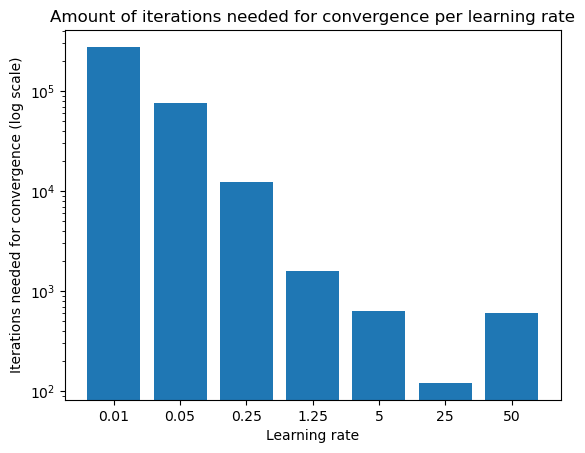

In [24]:
plt.bar(range(len(alpha_plot)),it_needed_plot)

plt.xlabel("Learning rate")
plt.ylabel("Iterations needed for convergence (log scale)")

plt.yscale('log')
plt.xticks(range(len(alpha_list)), alpha_list)

plt.title("Amount of iterations needed for convergence per learning rate")

plt.show()